In [499]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

In [500]:
img1 = cv2.imread("CM008F9.jpg")
img_gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img_gray1=cv2.GaussianBlur(img_gray1, (5, 5), 0)

img2 = cv2.imread("CM009F1.jpg")
img_gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img_gray2=cv2.GaussianBlur(img_gray2, (5, 5), 0)

In [501]:
sift = cv2.SIFT_create()

In [502]:
keypoints1, descriptors1 = sift.detectAndCompute(img_gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img_gray2, None)

In [503]:
FLAN_INDEX_KDTREE = 1
index_params = dict (algorithm = FLAN_INDEX_KDTREE, trees=5)
search_params = dict (checks=50)

In [504]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [505]:
matches = flann.knnMatch (descriptors1, descriptors2, k=2)

In [506]:
matchesMask = [[0,0] for i in range(len(matches))]

In [507]:
for i,(m1, m2) in enumerate (matches):
  if m1.distance < 0.65 * m2.distance:
    matchesMask[i] = [1,0]

In [508]:
draw_params = dict (matchColor = (0,0,255), singlePointColor = (0,255,0), matchesMask = matchesMask, flags=2 )

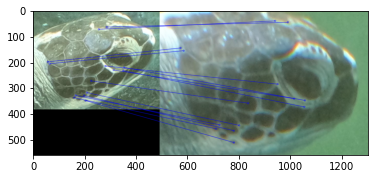

In [509]:
flann_matches =cv2.drawMatchesKnn(img1, keypoints1, img2, keypoints2, matches, None,**draw_params)
plt.imshow(flann_matches)

In [510]:
good_matches = []

for m1, m2 in matches:
  if m1.distance < 0.65 * m2.distance:
    good_matches.append([m1])

14


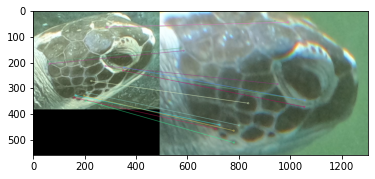

In [511]:
flann_matches = cv2.drawMatchesKnn(img1, keypoints1, img2, keypoints2, good_matches, None, flags=2)
print(len(good_matches))
plt.imshow(flann_matches)